<a href="https://colab.research.google.com/github/ashokkondhalkar/CAPSTONE-1-Hotel-Booking-Analysis-EDA/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [204]:
# Importing all neccesary python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
#Mount drive
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
#Providing file path & we are using pd.read_csv is used to load a CSV file as a pandas dataframe
file_path="/content/drive/MyDrive/AlmaBetter/Modules/ Topic/CAPSTONE-1-Hotel-Booking-Analysis-EDA/Hotel Bookings.csv"
hotel_df=pd.read_csv(file_path)

#Reading and Inspection

In [ ]:
# .head() function in Python displays the first five rows of the dataframe by default
hotel_df.head()

In [208]:
# .shape function shows DataFrame is made up of 119390 rows and 32 columns of data.
hotel_df.shape

(119390, 32)

In [ ]:
# .columns() function in Python displays the number of columns present in DataFrame   
hotel_df.columns

In [ ]:
# .describe() function in Python Provides information about statistical aspects of the DataFrame
hotel_df.describe()

In [ ]:
# .info() function Provides information about Dtype
hotel_df.info()

#Data Cleaning

In [ ]:
#checking missing value in columns
#.isna() or .isnull() function gives information about null values
hotel_df.isna().sum()

In [157]:
#DataFrame having 32 columns like 'children', 'company', 'country' and 'agent' have some null values.

In [ ]:
#column wise percentage with 2 decimal places
round(100*(hotel_df.isna().sum()/len(hotel_df.index)),2)

In [212]:
#lets make a copy of original DataFrame
hotel1=hotel_df.copy()

In [160]:
#lets find unique values if any
hotel1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [161]:
hotel1['is_canceled'].unique()

array([0, 1])

In [162]:
hotel1['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [163]:
#column childern having 0 as well as null values
hotel1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [164]:
hotel1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

#1.Removing Dublicate Row if any



In [213]:
hotel1[hotel1.duplicated()].shape

(31994, 32)

In [214]:
hotel1.drop_duplicates(inplace = True)

In [215]:
hotel1[hotel1.duplicated()].shape

(0, 32)

In [216]:
hotel1.shape

(87396, 32)

#2.Handling missing values

In [357]:
#sort values in ascending order
hotel1.isnull().sum().sort_values(ascending = True)

hotel                             0
reservation_status_date           0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
total_stay                        0
stays_in_weekend_nights           0
adults                            0
children                    

In [358]:
#sort values in decending order
hotel1.isnull().sum().sort_values(ascending = False)[:5]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
dtype: int64

In [359]:
print(hotel1['company'].unique()) 
#company having nan values

print(hotel1['agent'].unique())
#agent having nan values

print(hotel1['children'].unique())
#children having nan values


[  0 110 113 270 178 240 154 144 307 268  59 204 312 318  94 174 274 195
 223 317 281 118  53 286  12  47 324 342 373 371 383  86  82 218  88  31
 397 392 405 331 367  20  83 416  51 395 102  34  84 360 394 457 382 461
 478 386 112 486 421   9 308 135 224 504 269 356 498 390 513 203 263 477
 521 169 515 445 337 251 428 292 388 130 250 355 254 543 531 528  62 120
  42  81 116 530 103  39  16  92  61 501 165 291 290  43 325 192 108 200
 465 287 297 490 482 207 282 437 225 329 272  28  77 338  72 246 319 146
 159 380 323 511 407 278  80 403 399  14 137 343 346 347 349 289 351 353
  54  99 358 361 362 366 372 365 277 109 377 379  22 378 330 364 401 232
 255 384 167 212 514 391 400 376 402 396 302 398   6 370 369 409 168 104
 408 413 148  10 333 419 415 424 425 423 422 435 439 442 448 443 454 444
  52 459 458 456 460 447 470 466 484 184 485  32 487 491 494 193 516 496
 499  29  78 520 507 506 512 126  64 242 518 523 539 534 436 525 541  40
 455 410  45  38  49  48  67  68  65  91  37   8 17

In [360]:
 #For better calculation need to replace nan values by 0 
hotel1['company'] = hotel1['company'].fillna(0)
hotel1['agent'] = hotel1['agent'].fillna(0)

#For better calculation need to replace nan values by by its mean 
hotel1['children'].fillna(hotel1['children'].mean(),inplace=True)

print(hotel1['country'].isna().sum())

0


In [361]:
#only 'country' is remaing having null value so replace null value with 'some'
hotel1['country'].fillna('some',inplace=True)

#lets find if any null value remaing
hotel1.isnull().sum().sort_values(ascending = False)[:6]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
deposit_type            0
dtype: int64

3.converting column to appropriate datatype

In [362]:
#convert float datatype to interger
hotel1['children']=hotel1['children'].astype('int64')
hotel1['agent']=hotel1['agent'].astype('int64')
hotel1['company']=hotel1['company'].astype('int64')

In [363]:
#changing reservation_status_date to dataframe and store value in reservation_status_date

In [364]:
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'], format = '%Y-%m-%d')

4.Add important columns

In [365]:
hotel1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'totle_peoples'],
      dtype='object')

In [ ]:
#making new column for total_stays days in hotel
print(hotel1['stays_in_week_nights'])
print(hotel1['stays_in_weekend_nights'])

In [395]:
hotel1['total_stay'] =hotel1['stays_in_week_nights']+hotel1['stays_in_weekend_nights']

In [ ]:
#making new column totle_peoples by addition of babies,adults,children
print(hotel1['babies'])
print(hotel1['adults'])
print(hotel1['children'])

In [369]:
hotel1['totle_peoples']=hotel1['babies']+hotel1['adults']+hotel1['children']

EDA

In [370]:
#Lets first find the correlation between the numerical data

In [ ]:
hotel1.info()

In [372]:
'''let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.
 So no need correction for this data
 Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.
'''


"let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.\n So no need correction for this data\n Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.\n"

In [373]:
corel_df = hotel1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','totle_peoples']]


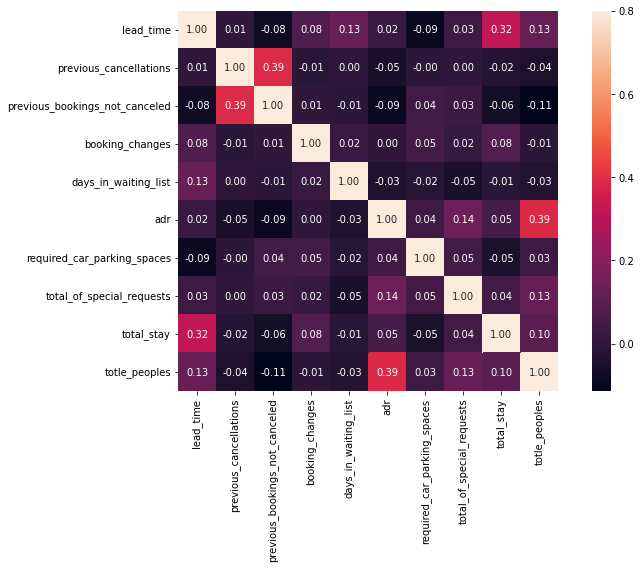

In [374]:
#correlation matrix
cor_matrix = corel_df .corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(cor_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [375]:

#Here adr is corelated with totle_peoples.if no peoples increases then revenue must be increses.so adr(average daily rate) will be more

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()

In [392]:
#here we are just apply condition for better scatterplot
hotel1.drop(hotel1[hotel1['adr']>2000].index,inplace=True)

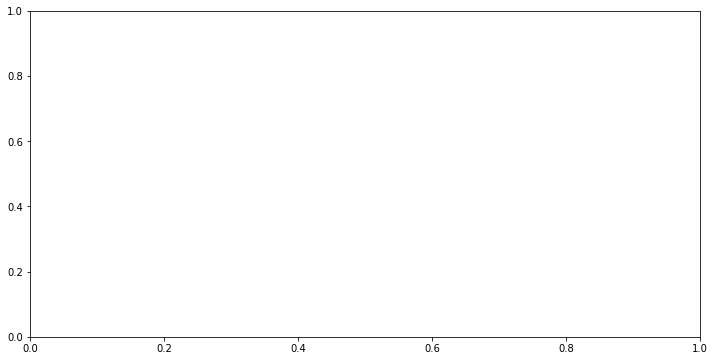

In [393]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()